# Keras ResNet classifier for CIFAR10 test
ResNet32 network for CIFAR10 network test

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import tensorflow as tf 
from keras import backend as k
import os
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.1
config.gpu_options.allow_growth = True
k.tensorflow_backend.set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# get data
cifar10_data = CIFAR10Data()
x_train, y_train, x_test, y_test = cifar10_data.get_data(subtract_mean=True)

num_train = int(x_train.shape[0] * 0.9)
num_val = x_train.shape[0] - num_train
mask = list(range(num_train, num_train+num_val))
x_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(num_train))
x_train = x_train[mask]
y_train = y_train[mask]

data = (x_train, y_train, x_val, y_val, x_test, y_test)

CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


# test with resnet32
resnet56 is inffered in the ResNet paper.

In [12]:
from classifiers.ResNet import ResNet32ForCIFAR10
from keras import losses
from keras import optimizers

weight_decay = 1e-4
lr = 1e-1
num_classes = 10
resnet32 = ResNet32ForCIFAR10(input_shape=(32, 32, 3), classes=num_classes, weight_decay=weight_decay)
opt = optimizers.SGD(lr=lr, momentum=0.9, nesterov=False)
resnet32.compile(optimizer=opt,
                 loss=losses.categorical_crossentropy,
                 metrics=['accuracy'])
resnet32.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 32, 32, 16)   432         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, 32, 32, 16)   64          conv2d_44[0][0]                  
__________________________________________________________________________________________________
activation_41 (Activation)      (None, 32, 32, 16)   0           batch_normalization_44[0][0]     
__________________________________________________________________________________________________
conv2d_45 

In [13]:
%%time
from cifar10_solver import *
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    new_lr = lr
    if epoch <= 91:
        pass
    elif epoch > 91 and epoch <= 137:
        new_lr = lr * 0.1
    else:
        new_lr = lr * 0.01
    print('new lr:%.2e' % new_lr)
    return new_lr 


reduce_lr = LearningRateScheduler(lr_scheduler)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=10, min_lr=1e-6, verbose=1)

solver = CIFAR10Solver(resnet32, data)
history = solver.train(epochs=182, batch_size=128, data_augmentation=True, callbacks=[reduce_lr])

train with data augmentation
Epoch 1/182
new lr:1.00e-01
352/352 [==============================] - 38s 109ms/step - loss: 2.1557 - acc: 0.2694 - val_loss: 2.8531 - val_acc: 0.2622
Epoch 2/182
new lr:1.00e-01
352/352 [==============================] - 27s 77ms/step - loss: 1.6408 - acc: 0.4451 - val_loss: 1.7122 - val_acc: 0.4564
Epoch 3/182
new lr:1.00e-01
352/352 [==============================] - 27s 76ms/step - loss: 1.3569 - acc: 0.5631 - val_loss: 1.3228 - val_acc: 0.5820
Epoch 4/182
new lr:1.00e-01
352/352 [==============================] - 27s 77ms/step - loss: 1.1406 - acc: 0.6460 - val_loss: 1.4607 - val_acc: 0.5680
Epoch 5/182
new lr:1.00e-01
352/352 [==============================] - 27s 77ms/step - loss: 0.9801 - acc: 0.7086 - val_loss: 1.0653 - val_acc: 0.7036
Epoch 6/182
new lr:1.00e-01
352/352 [==============================] - 27s 76ms/step - loss: 0.8899 - acc: 0.7438 - val_loss: 1.0156 - val_acc: 0.6980
Epoch 7/182
new lr:1.00e-01
352/352 [===========================

Epoch 55/182
new lr:1.00e-01
352/352 [==============================] - 29s 83ms/step - loss: 0.4653 - acc: 0.9150 - val_loss: 0.8679 - val_acc: 0.7980
Epoch 56/182
new lr:1.00e-01
352/352 [==============================] - 29s 83ms/step - loss: 0.4642 - acc: 0.9156 - val_loss: 0.8163 - val_acc: 0.8092
Epoch 57/182
new lr:1.00e-01
352/352 [==============================] - 30s 85ms/step - loss: 0.4632 - acc: 0.9153 - val_loss: 0.8447 - val_acc: 0.8198
Epoch 58/182
new lr:1.00e-01
352/352 [==============================] - 30s 85ms/step - loss: 0.4719 - acc: 0.9122 - val_loss: 0.6929 - val_acc: 0.8550
Epoch 59/182
new lr:1.00e-01
352/352 [==============================] - 30s 85ms/step - loss: 0.4605 - acc: 0.9188 - val_loss: 0.7906 - val_acc: 0.8196
Epoch 60/182
new lr:1.00e-01
352/352 [==============================] - 29s 83ms/step - loss: 0.4614 - acc: 0.9163 - val_loss: 0.8057 - val_acc: 0.8174
Epoch 61/182
new lr:1.00e-01
352/352 [==============================] - 29s 84ms/step - 

Epoch 109/182
new lr:1.00e-02
352/352 [==============================] - 34s 96ms/step - loss: 0.2215 - acc: 0.9897 - val_loss: 0.4910 - val_acc: 0.9252
Epoch 110/182
new lr:1.00e-02
352/352 [==============================] - 34s 98ms/step - loss: 0.2151 - acc: 0.9909 - val_loss: 0.4956 - val_acc: 0.9250
Epoch 111/182
new lr:1.00e-02
352/352 [==============================] - 34s 97ms/step - loss: 0.2124 - acc: 0.9911 - val_loss: 0.4797 - val_acc: 0.9278
Epoch 112/182
new lr:1.00e-02
352/352 [==============================] - 34s 98ms/step - loss: 0.2096 - acc: 0.9910 - val_loss: 0.4875 - val_acc: 0.9276
Epoch 113/182
new lr:1.00e-02
352/352 [==============================] - 35s 99ms/step - loss: 0.2044 - acc: 0.9919 - val_loss: 0.4855 - val_acc: 0.9258
Epoch 114/182
new lr:1.00e-02
352/352 [==============================] - 36s 102ms/step - loss: 0.2018 - acc: 0.9925 - val_loss: 0.5005 - val_acc: 0.9242
Epoch 115/182
new lr:1.00e-02
352/352 [==============================] - 35s 99ms

352/352 [==============================] - 29s 84ms/step - loss: 0.1320 - acc: 0.9988 - val_loss: 0.4755 - val_acc: 0.9322
Epoch 163/182
new lr:1.00e-03
352/352 [==============================] - 30s 84ms/step - loss: 0.1316 - acc: 0.9987 - val_loss: 0.4759 - val_acc: 0.9316
Epoch 164/182
new lr:1.00e-03
352/352 [==============================] - 29s 84ms/step - loss: 0.1307 - acc: 0.9991 - val_loss: 0.4755 - val_acc: 0.9328
Epoch 165/182
new lr:1.00e-03
352/352 [==============================] - 29s 83ms/step - loss: 0.1311 - acc: 0.9989 - val_loss: 0.4777 - val_acc: 0.9328
Epoch 166/182
new lr:1.00e-03
352/352 [==============================] - 29s 84ms/step - loss: 0.1314 - acc: 0.9983 - val_loss: 0.4758 - val_acc: 0.9326
Epoch 167/182
new lr:1.00e-03
352/352 [==============================] - 30s 84ms/step - loss: 0.1310 - acc: 0.9986 - val_loss: 0.4779 - val_acc: 0.9324
Epoch 168/182
new lr:1.00e-03
352/352 [==============================] - 30s 85ms/step - loss: 0.1309 - acc: 0.9

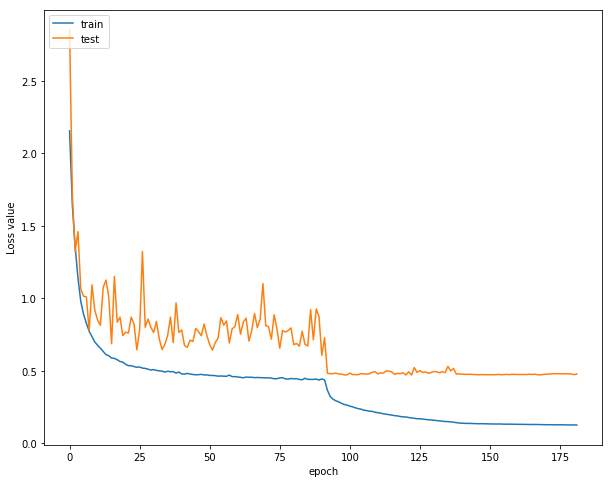

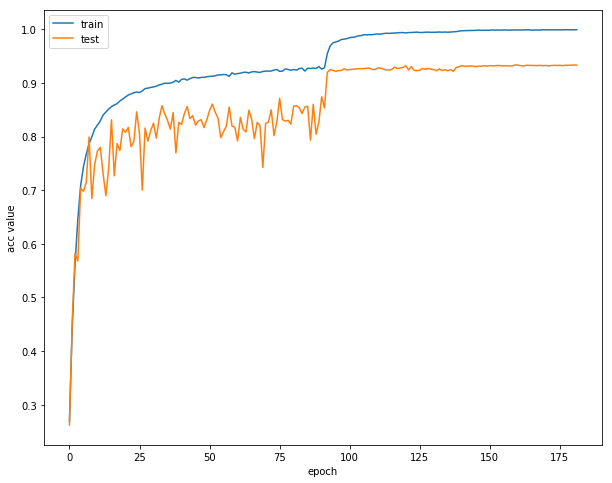

In [14]:
# plot loss and acc 
plot_history(history)

In [15]:
solver.test()

10000/10000 [==============================] - 9s 908us/step
test data loss:0.52 acc:0.9234
